# **Analysis and Prediction on Big Mart Sales data.**


The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Objective** - The aim is to build a predictive model and find out the sales of each product at a particular store.

## **Data Description**




Data
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

**Variable**                          **Description**


**Item_Identifier**                 - Unique product ID

**Item_Weight**                    -  Weight of product

Item_Fat_Content               -  Whether the product is low fat or not

Item_Visibility                -  The % of total display area of all products in a store                                       allocated to the particular product

Item_Type                       - The category to which the product belongs

Item_MRP                       -  Maximum Retail Price (list price) of the product

Outlet_Identifier             -  Unique store ID

Outlet_Establishment_Year     - The year in which store was established

Outlet_Size                    - The size of the store in terms of ground area covered 

Outlet_Location_Type           - The type of city in which the store is located

Outlet_Type                  -   Whether the outlet is just a grocery store or some sort of                                  supermarket

Item_Outlet_Sales            -  Sales of the product in the particulat store. This is the                                   outcome variable to be predicted.



 




## Import required Libraries

In [ ]:
%matplotlib inline
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


                 

## **Load the Dataset**

In [ ]:
# Loading train Dataset
train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Projects/Big Mart sales/Train.txt')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


* **Checking the datatypes of each columns**

In [ ]:
# Loading test Dataset.
test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Projects/Big Mart sales/Test.txt')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
# Loading submission file
submission_file = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Projects/Big Mart sales/SampleSubmission.txt')
submission_file

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN
...,...,...,...
5676,FDB58,OUT046,NaN
5677,FDD47,OUT018,NaN
5678,NCO17,OUT045,NaN
5679,FDJ26,OUT017,NaN


### **Data Understanding**

In [ ]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [ ]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [ ]:
print(len(train))
print(len(test))

8523
5681


**Since we have to do some analysis and feature enginnering on both train and test data .So combine both the dataset after doing this we will divide them.**
Lets combine them into a dataframe ‘df’ with a ‘source’ column specifying where each observation belongs.

In [ ]:
train['source'] = 'train'
test['source'] = 'test'
df = pd.concat([train,test], ignore_index = True,sort =True)
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [ ]:
df.shape

(14204, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           14204 non-null  object 
 1   Item_Identifier            14204 non-null  object 
 2   Item_MRP                   14204 non-null  float64
 3   Item_Outlet_Sales          8523 non-null   float64
 4   Item_Type                  14204 non-null  object 
 5   Item_Visibility            14204 non-null  float64
 6   Item_Weight                11765 non-null  float64
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Identifier          14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Size                10188 non-null  object 
 11  Outlet_Type                14204 non-null  object 
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

**Quick analysis by using describe**

In [ ]:
# Stats apply to numeric data.
df.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


**Observation** -
1   The minimum value of Item_Visibility is zero which makes no sense because when a product is being       sold in a store, the visibility cannot be 0.

In [ ]:
# Apply statistics on all types of data
df.describe(include='object')

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
count,14204,14204,14204,14204,14204,10188,14204,14204
unique,5,1559,16,10,3,3,4,2
top,Low Fat,FDL39,Fruits and Vegetables,OUT027,Tier 3,Medium,Supermarket Type1,train
freq,8485,10,2013,1559,5583,4655,9294,8523


**Checking for NaN values**

In [ ]:

df.isnull().values.any()

True

In [ ]:
# Finding total number of null values in each column.
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

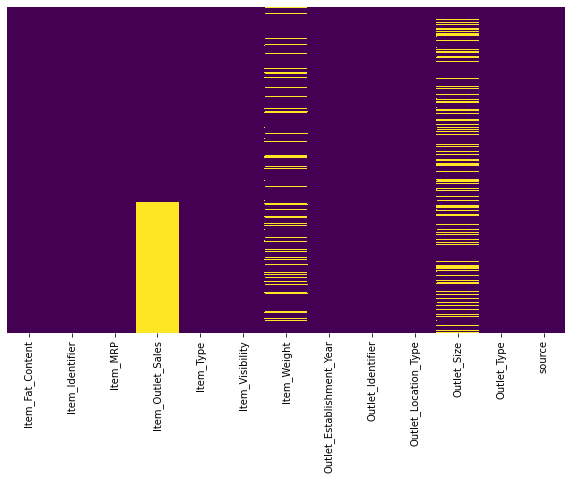

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(df.isnull(), yticklabels=False,cbar = False,cmap ='viridis')

**Observation-**
* The columns item weight and outlet size contains missing values so we will  replace these missing values with mean and mode for numeric and categorical   variables respectively.
* The Item_Outlet_Sales is the target variable and missing values are ones in the test set.

In [ ]:
# Finding total number of null values in whole dataset.
df.isnull().sum().sum()

12136

In [ ]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [ ]:
#train.isna()

In [ ]:
#df.set_index(['Outlet_Identifier','Item_Identifier'],inplace = False)

In [ ]:
#df.sort_index()

# **Visualization and Exploratory Data Analysis**

## **Univariate Analysis**

**1. Item Fat Content**

In [ ]:
count = df['Item_Fat_Content'].value_counts()
count

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

**Inference**- From the above observation it seems that Low Fat, LF and low fat are all same. And reg and Regular fat content are also same.<br>
Therefore replace LF and low fat with Low Fat and reg with regular.

In [ ]:
#replace LF and low fat with Low Fat and reg with regular.
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

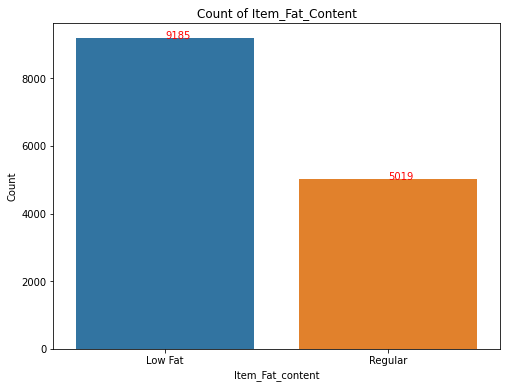

In [ ]:
plt.figure(figsize=(8,6))
graph = sns.countplot(x = df['Item_Fat_Content'], data = df, color = None)
plt.xlabel('Item_Fat_content')
plt.ylabel('Count')
plt.title('Count of Item_Fat_Content')
s = df['Item_Fat_Content'].value_counts()
for i, v in s.reset_index().iterrows():
    graph.text(i, v.Item_Fat_Content , v.Item_Fat_Content, color='red',)

plt.show()

**Observations-** 
* There are only two Item Fat Content Low Fat and Regular fat.
* Total number of Low Fat item fat content is 9,185 while Regular fat content is 5019 which is much higher less than the Low Fat content.

**Inference**- 
* Most of the products are of low fat as compared to regular fat.

In [ ]:
pd.set_option('display.max_rows', 20)

**2. Item Identifier**

In [ ]:
df['Item_Identifier'].value_counts()

FDL39    10
NCP55    10
FDM60    10
FDT51    10
FDL12    10
         ..
FDL50     7
FDS22     7
NCW54     7
DRN11     7
FDM52     7
Name: Item_Identifier, Length: 1559, dtype: int64

**Observation**
* There are 1559 unique item identifier ( unique product id) i.e 1559 different products.

**3. Item type**

In [ ]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

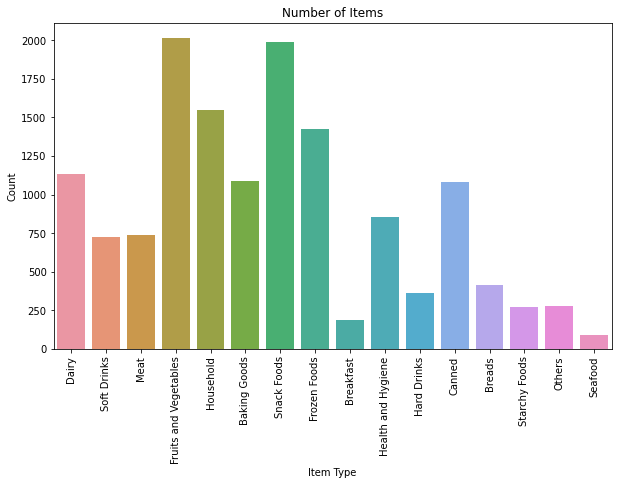

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot('Item_Type', data = df)
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.title('Number of Items')

X = plt.gca().xaxis
for item in X.get_ticklabels():
  item.set_rotation(90)
plt.show()

**Observation**
* There are total 16 differernt items are sold in a bigmart sales.
* Friuits and vegetables and Snak foods are sold maximum times around 2000 times
* While Seafoods are sold minimum times just 89 times.

**4. Outlet Identifier**

In [ ]:
df['Outlet_Identifier'].value_counts()


OUT027    1559
OUT013    1553
OUT046    1550
OUT049    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

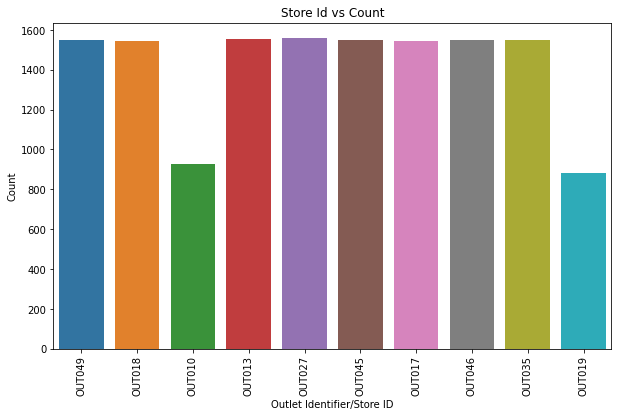

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot('Outlet_Identifier',data = df)
plt.xlabel('Outlet Identifier/Store ID')
plt.ylabel('Count')
plt.title('Store Id vs Count')

X = plt.gca().xaxis
for item in X.get_ticklabels():
  item.set_rotation(90)
plt.show()

**Observations**
* There are only 10 different stores participated in Bigmart sales.
* Almost all stores has equal sales but store id 'OUT010' and store id OUT019 has less number of sales.

**5. Outlet Location type**

In [ ]:
df['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

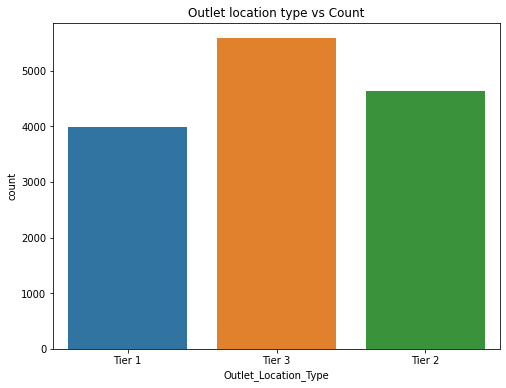

In [ ]:
plt.figure(figsize=(8,6))
ax= sns.countplot('Outlet_Location_Type', data = df)
plt.title('Outlet location type vs Count')

# Rotaion 
X = plt.gca().xaxis
for items in X.get_ticklabels():
  items.set_rotation(0)
plt.show()

 **Observation**
* There are three different types of cities int which the stores are located, they are Tier1, Tier2 and Toer 3.
* Most stores are located in 3 tier cities exactly 5583 stores.
Only 3980 stores are located in 1 tier cities and 4641 stores are located in 2 tier cities.

**6. Outlet Size**

In [ ]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

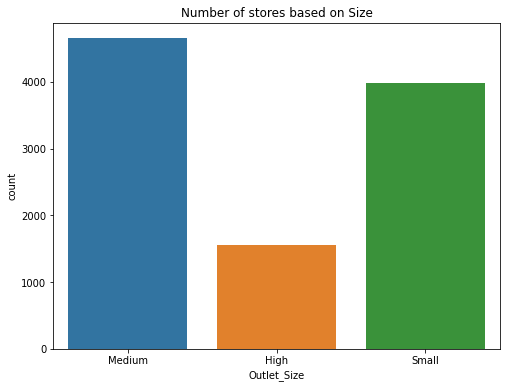

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot('Outlet_Size', data = df)
plt.title('Number of stores based on Size')
plt.show()

**Observation**
* There are three types of stores based on the size.
* Mostly store are medium size i.e 4,655 stores.
* Only 1553 stores are high size i.e 1553 stores are big in size in terms of ground area covered.

**7. Outlet Type**

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

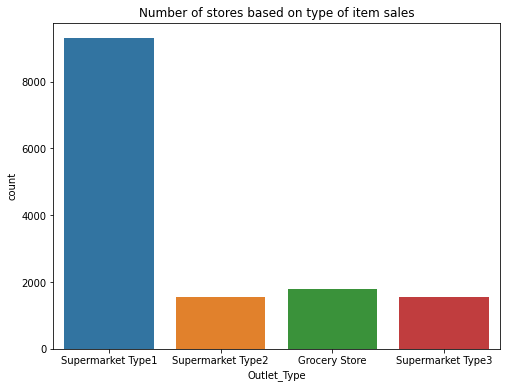

In [ ]:
plt.figure(figsize = (8,6))
ax = sns.countplot('Outlet_Type', data = df)
plt.title('Number of stores based on type of item sales')
plt.show()

* There are only 4 types of stores based on the items they sale.
* Supermarket type1 stores are more in number as compared to other stores and they are 9,294 in numbers.
* There are 1805, 1559, 1546 stores of Grocery store, supermarket type3 and supermarket type1 respectively.

# 8 Item MRP

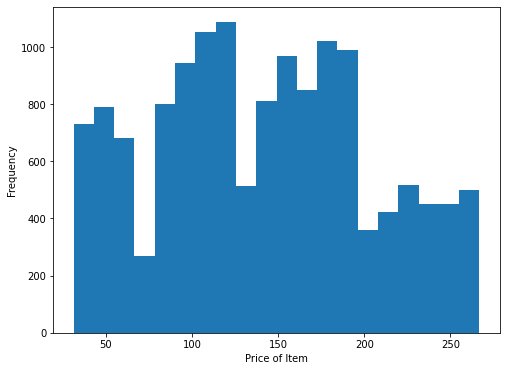

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df['Item_MRP'],bins = 20)
plt.xlabel('Price of Item')
plt.ylabel('Frequency')
plt.show()

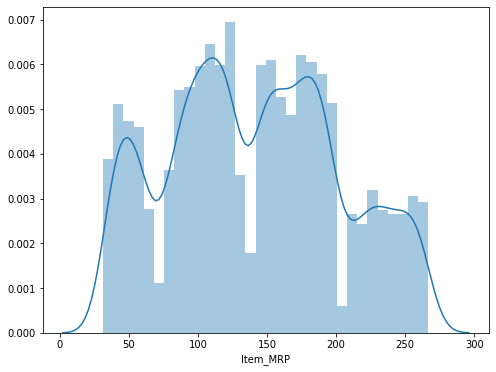

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['Item_MRP'], hist = True, kde = True)
plt.show()

**Observation**
* Most of the items sale have price range between Rs 100 - 200
* Only few items are sold who has price more than Rs 200.

**9. Item Weight**

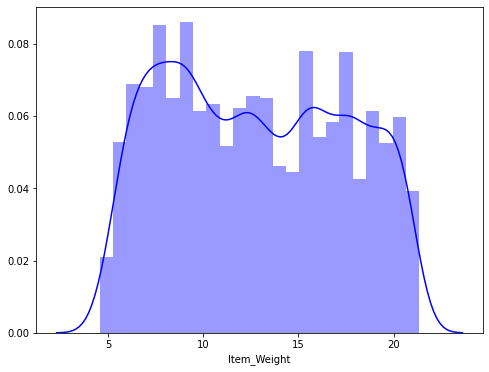

In [ ]:
plt.figure(figsize= (8,6))
sns.distplot(df['Item_Weight'], hist = True, kde = True,color = 'blue')
plt.show()

**Observation**
* Item weight is equally distributed i.e It shows normal distribution.
* Almost all items weight lies between 5 to 20 kg

**10 Item Outlet sales** -  Sales of the product in the particulat store. This is the outcome variable to be predicted.

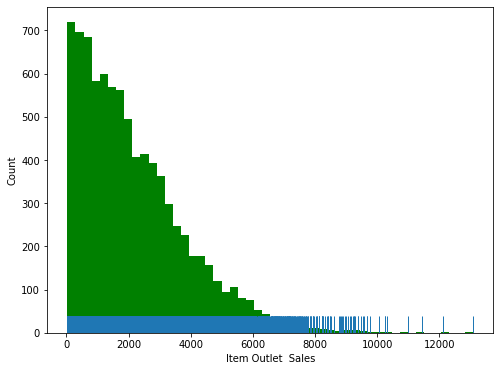

In [ ]:
plt.figure(figsize = (8,6))
sns.distplot(df['Item_Outlet_Sales'], hist = True, kde = False,rug = True,
             hist_kws={ "linewidth": 3, "alpha": 1, "color": 'g'})
plt.xlabel('Item Outlet  Sales')
plt.ylabel('Count')
plt.show()

**Observation**
* The item outlet sales are not equally distributed i.e not an normal distribution, but it is a right skewed.
* Most of the items items are in a sale having a sale between 0-2000.
* There are also some items that sales ranges between 2000- 6000.
* Only few items having sales more than 6000.

## **Bivaraite Analysis**

**Sales vs Item Fat Content**

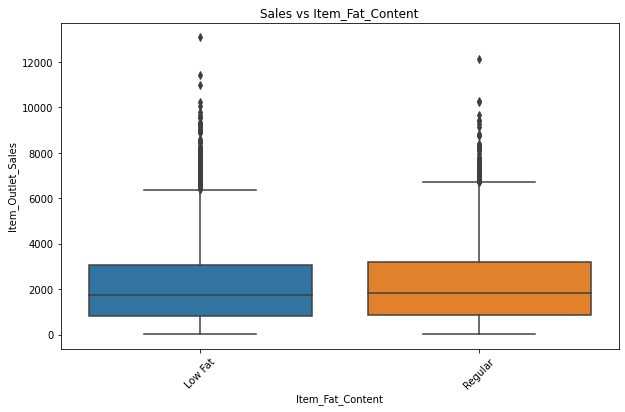

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data = df)
X=plt.gca().xaxis

# Rotating the Xicklabels
for item in X.get_ticklabels():
  item.set_rotation(45)
plt.title('Sales vs Item_Fat_Content')
plt.show()

**Observation**
* 50th percentile sales of both low fat and Regular fat items are somewhere around 2000.
* Item outlet sales in both contains some outliers.
* from above graph it can be clear that both plot are right skewed.

**12. Sales vs Item Type**

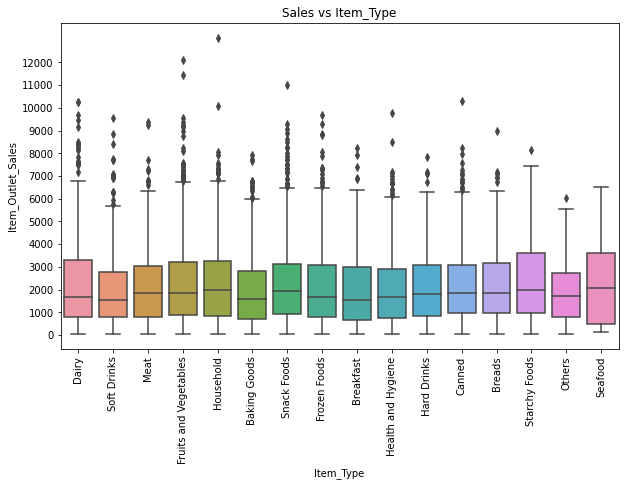

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data = train)
X=plt.gca().xaxis

# Rotating the Xicklabels
for item in X.get_ticklabels():
  item.set_rotation(90)
plt.title('Sales vs Item_Type')
plt.yticks(np.arange(0,13000,1000))
plt.show()

**Observation**
* 50th percentile of items based on category have salesaround 2000.
* Through the above boxplot only seafood does not have outliers except this all have an outliers.

**Item weight vs Outlet Identifier**


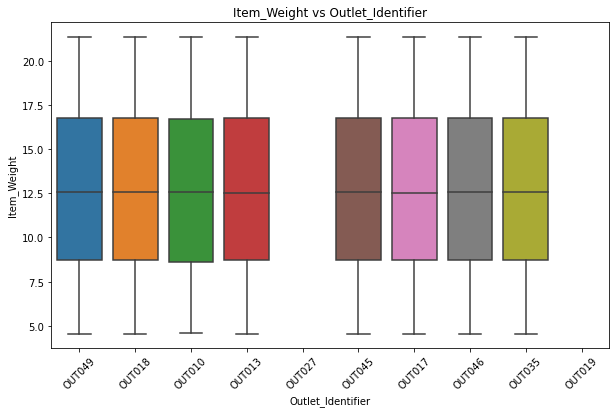

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Outlet_Identifier',y='Item_Weight',data = df)
X=plt.gca().xaxis

# Rotating the Xicklabels
for item in X.get_ticklabels():
  item.set_rotation(45)
plt.title('Item_Weight vs Outlet_Identifier')
plt.show()

**Observation**-
* In the above plot we can see that storeId 0r Outlet_identifier OUT027 and OUT019 does not show the boxplot because for this store id the item weight is none.
* The weight of items at each store are equally distributed.

##  Handling missing values. 

**Filling missing values of item weight with the mean of that columns**

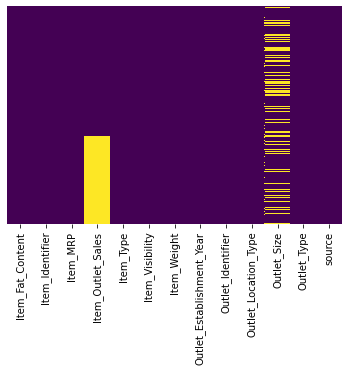

In [ ]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace = True)
#df.fillna({"Item_Weight":df["Item_Weight"].mean()},inplace=True)

sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap ='viridis')

**Observation** 
* Now the item weight deos not contain any missing values.

**Filling the missing values of Outlet size using forward fill method.**

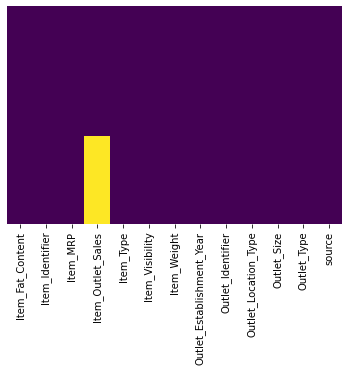

In [ ]:
df['Outlet_Size'].fillna(method = 'ffill',inplace=True)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

**Observation**
* Now the Outlet_Size does not conatin any missing values.

**Sales vs Outlet Identifier**

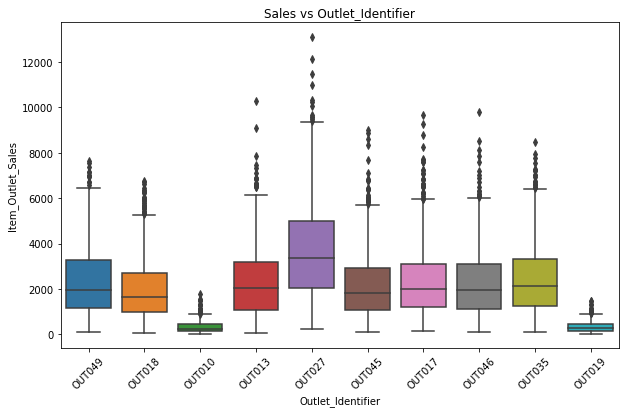

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data = df)
X=plt.gca().xaxis

# Rotating the Xicklabels
for item in X.get_ticklabels():
  item.set_rotation(45)
plt.title('Sales vs Outlet_Identifier')
plt.show()

**Observation** - All the items with different fat content have almost same Item_Outlet_Sales but Low Fat content have more outliers than others fat content item

**Observation** - 
* From the above boxplot we can easily identify that store id OUT010 and OUT019 has very less sales as compared to the other stores. 
* Through we can easily find that the all the outlet identifer has a outliers.

In [ ]:
df_ = df.groupby(['Outlet_Type']).agg({'Item_Outlet_Sales':np.mean}).reset_index()
df_

,Outlet_Type,Item_Outlet_Sales
0,Grocery Store,339.828500
1,Supermarket Type1,2316.181148
2,Supermarket Type2,1995.498739
3,Supermarket Type3,3694.038558


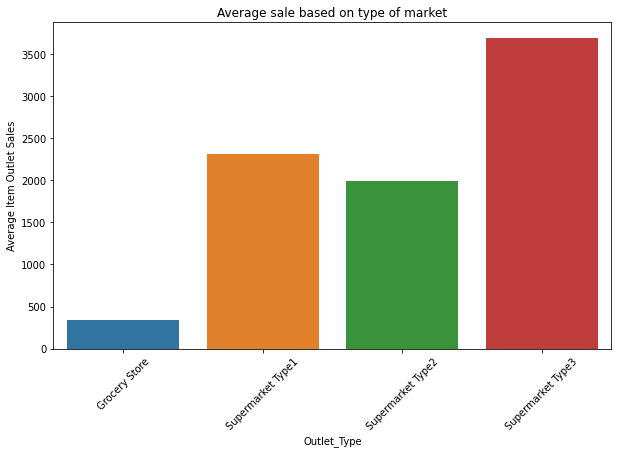

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', data = df_)
plt.xlabel('Outlet_Type')
plt.ylabel('Average Item Outlet Sales')

X = plt.gca().xaxis
for item in X.get_ticklabels():
  item.set_rotation(45)
plt.title('Average sale based on type of market')
plt.show()


**Observation** 
* Grocery stores have very less sales as compared to other type of markets.
It means that people prefer to buy items from supermarkeks rather than Grocery stores.

In [ ]:
df_=df.groupby(['Outlet_Type','Outlet_Establishment_Year']).agg({'Item_Outlet_Sales':np.mean}).reset_index()
df_

                       

,Outlet_Type,Outlet_Establishment_Year,Item_Outlet_Sales
0,Grocery Store,1985,340.329723
1,Grocery Store,1998,339.351662
2,Supermarket Type1,1987,2298.995256
3,Supermarket Type1,1997,2277.844267
4,Supermarket Type1,1999,2348.354635
5,Supermarket Type1,2002,2192.384798
6,Supermarket Type1,2004,2438.841866
7,Supermarket Type1,2007,2340.675263
8,Supermarket Type2,2009,1995.498739
9,Supermarket Type3,1985,3694.038558


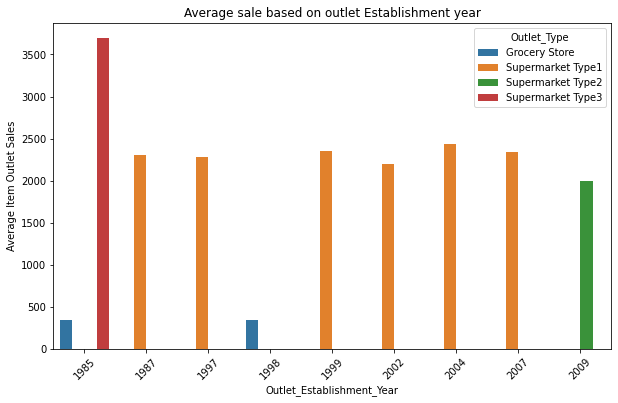

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', hue = 'Outlet_Type', data = df_)
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Average Item Outlet Sales')

X = plt.gca().xaxis
for item in X.get_ticklabels():
  item.set_rotation(45)
plt.title('Average sale based on outlet Establishment year')
plt.show()

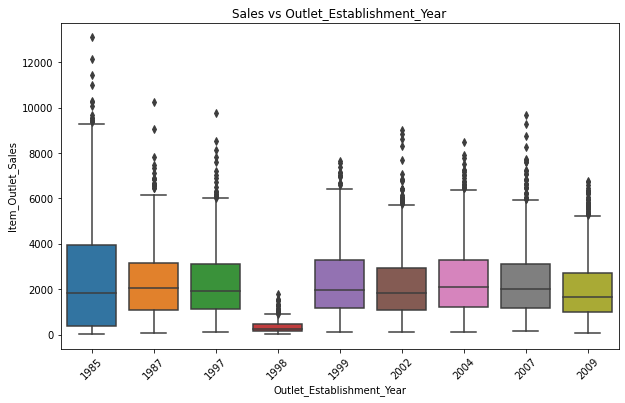

In [ ]:
% matplotlib inline
plt.figure(figsize =(10,6))
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales',data = df)

X=plt.gca().xaxis

# Rotating the Xicklabels
for item in X.get_ticklabels():
  item.set_rotation(45)
plt.title('Sales vs Outlet_Establishment_Year')
plt.show()

**Observation** - It is very clear from the above boxplot that the store which was established int year 1985 has highest sales but the stores which was established in year 1998 has minimum sales

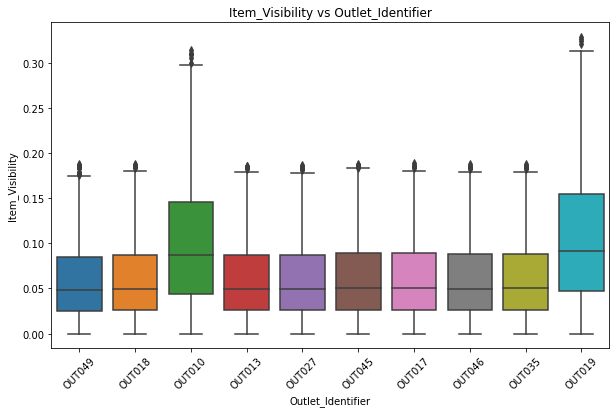

In [ ]:
plt.figure(figsize =(10,6))
sns.boxplot(x='Outlet_Identifier', y='Item_Visibility',data = df)

X=plt.gca().xaxis

# Rotating the Xicklabels
for item in X.get_ticklabels():
  item.set_rotation(45)
plt.title('Item_Visibility vs Outlet_Identifier')
plt.show()

In [ ]:
df1=df.groupby(['Outlet_Type','Outlet_Identifier']).agg({'Item_Outlet_Sales':np.mean})
df1

Item_Outlet_Sales
Outlet_Type       Outlet_Identifier                   
Grocery Store     OUT010                    339.351662
                  OUT019                    340.329723
Supermarket Type1 OUT013                   2298.995256
                  OUT017                   2340.675263
                  OUT035                   2438.841866
                  OUT045                   2192.384798
                  OUT046                   2277.844267
                  OUT049                   2348.354635
Supermarket Type2 OUT018                   1995.498739
Supermarket Type3 OUT027                   3694.038558

In [ ]:
df1.reset_index()

,Outlet_Type,Outlet_Identifier,Item_Outlet_Sales
0,Grocery Store,OUT010,339.351662
1,Grocery Store,OUT019,340.329723
2,Supermarket Type1,OUT013,2298.995256
3,Supermarket Type1,OUT017,2340.675263
4,Supermarket Type1,OUT035,2438.841866
5,Supermarket Type1,OUT045,2192.384798
6,Supermarket Type1,OUT046,2277.844267
7,Supermarket Type1,OUT049,2348.354635
8,Supermarket Type2,OUT018,1995.498739
9,Supermarket Type3,OUT027,3694.038558


In [ ]:
df2=train.groupby(['Outlet_Type','Outlet_Size']).agg({'Item_Outlet_Sales':np.mean})
df2

Item_Outlet_Sales
Outlet_Type       Outlet_Size                   
Grocery Store     Small               340.329723
Supermarket Type1 High               2298.995256
                  Medium             2348.354635
                  Small              2358.343066
Supermarket Type2 Medium             1995.498739
Supermarket Type3 Medium             3694.038558

In [ ]:
df2.reset_index()

,Outlet_Type,Outlet_Size,Item_Outlet_Sales
0,Grocery Store,Small,340.329723
1,Supermarket Type1,High,2298.995256
2,Supermarket Type1,Medium,2348.354635
3,Supermarket Type1,Small,2358.343066
4,Supermarket Type2,Medium,1995.498739
5,Supermarket Type3,Medium,3694.038558


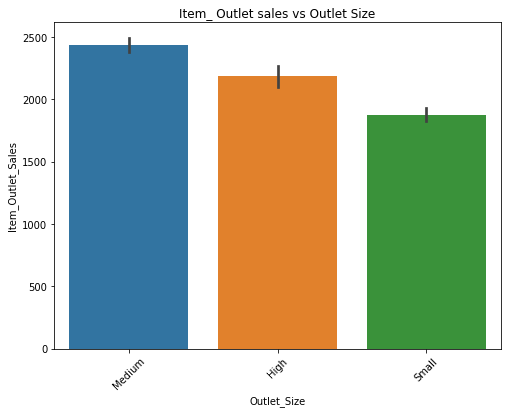

In [ ]:
plt.figure(figsize =(8,6))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales',data = df)

X=plt.gca().xaxis

# Rotating the Xicklabels
for item in X.get_ticklabels():
  item.set_rotation(45)
plt.title('Item_ Outlet sales vs Outlet Size')
plt.show()

**Observation**
* Small size stores has less sales, while medium size stores has high sales as comapared to others

## Visualization of a numeric varaibles

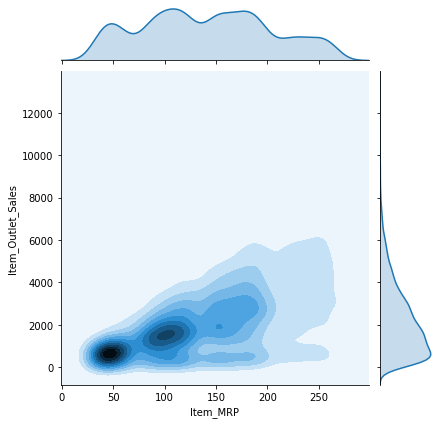

In [ ]:
sns.jointplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = train, kind = 'kde',dropna = True)

## **Multivariate Analysis**

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must 

<Figure size 360x360 with 0 Axes>

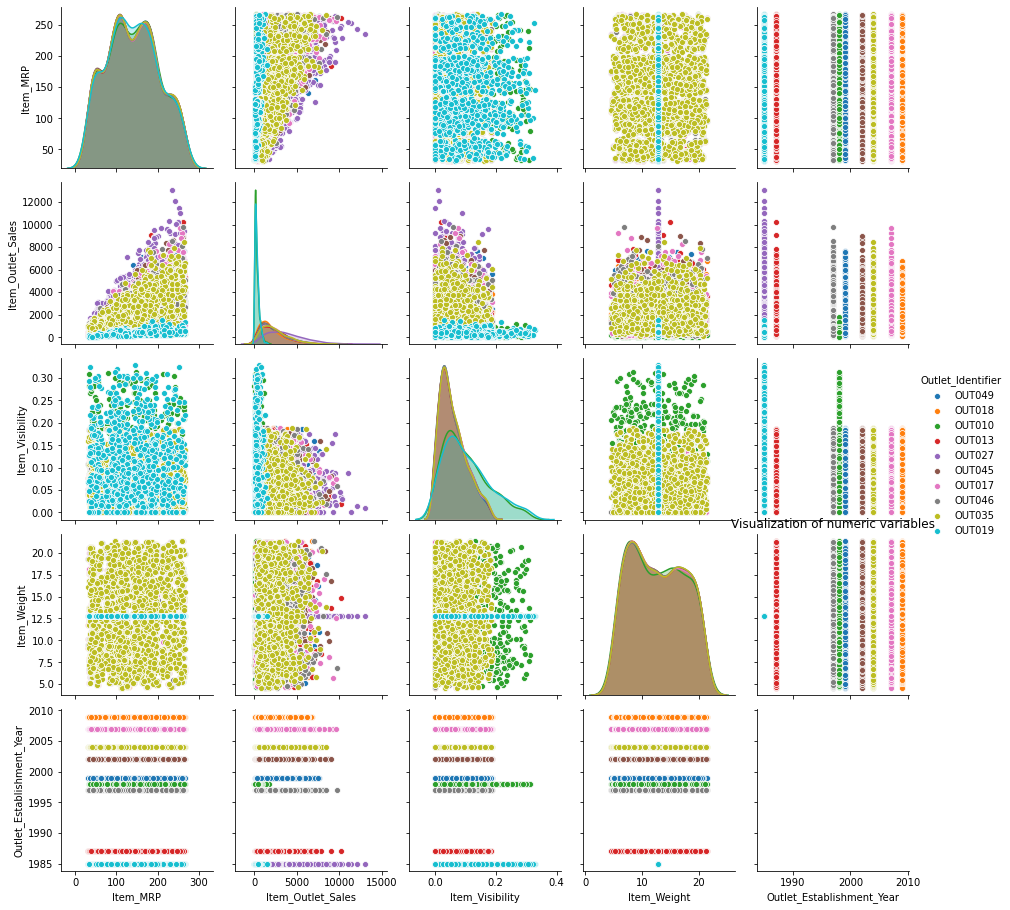

In [ ]:
#% matplotlib inline
plt.figure(figsize = (5,5))
sns.pairplot(df, hue = 'Outlet_Identifier', diag_kind = 'kde')
plt.title('Visualization of numeric variables')
plt.show()

# Feature Engineering

### Modify the columns the Item_Visibility since it contain 0 values which is meaningless

In [ ]:
mean= df['Item_Visibility'].mean()
df['Item_Visibility'] = df['Item_Visibility'].replace(0,mean)
print('Number of zeroes:%d'%sum(df['Item_Visibility']==0))

Number of zeroes:0


**Determine the years of operation of a store**

In [ ]:
#Years:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years']

0        14
1         4
2        14
3        15
4        26
         ..
14199    16
14200     4
14201    11
14202     6
14203    11
Name: Outlet_Years, Length: 14204, dtype: int64

In [ ]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train,15
4,Low Fat,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,26


## Label Encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
variables = ['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type','Outlet','Outlet_Size']
le = LabelEncoder()
for i in variables:
  df[i] = le.fit_transform(df[i])


## One Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns = ['Item_Fat_Content', 'Item_Type','Outlet_Location_Type','Outlet_Type','Outlet','Outlet_Size'])
df.dtypes


Item_Identifier       object
Item_MRP             float64
Item_Outlet_Sales    float64
Item_Visibility      float64
Item_Weight          float64
                      ...   
Outlet_8               uint8
Outlet_9               uint8
Outlet_Size_0          uint8
Outlet_Size_1          uint8
Outlet_Size_2          uint8
Length: 47, dtype: object

In [ ]:
df.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2
0,FDA15,249.8092,3735.1380,0.016047,9.30,1999,OUT049,train,14,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,DRC01,48.2692,443.4228,0.019278,5.92,2009,OUT018,train,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,1999,OUT049,train,14,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,FDX07,182.0950,732.3800,0.065953,19.20,1998,OUT010,train,15,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,NCD19,53.8614,994.7052,0.065953,8.93,1987,OUT013,train,26,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.shape

(14204, 47)

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility',
       'Item_Weight', 'Outlet_Establishment_Year', 'Outlet_Identifier',
       'source', 'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Type_0', 'Item_Type_1', 'Item_Type_2', 'Item_Type_3',
       'Item_Type_4', 'Item_Type_5', 'Item_Type_6', 'Item_Type_7',
       'Item_Type_8', 'Item_Type_9', 'Item_Type_10', 'Item_Type_11',
       'Item_Type_12', 'Item_Type_13', 'Item_Type_14', 'Item_Type_15',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_0', 'Outlet_1', 'Outlet_2',
       'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Outlet_9', 'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2'],
      dtype='object')

## Removing Unnecessary columns

In [ ]:
df.drop('Outlet_Establishment_Year',axis=1,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_Identifier         14204 non-null  object 
 1   Item_MRP                14204 non-null  float64
 2   Item_Outlet_Sales       8523 non-null   float64
 3   Item_Visibility         14204 non-null  float64
 4   Item_Weight             14204 non-null  float64
 5   Outlet_Identifier       14204 non-null  object 
 6   source                  14204 non-null  object 
 7   Outlet_Years            14204 non-null  int64  
 8   Item_Fat_Content_0      14204 non-null  uint8  
 9   Item_Fat_Content_1      14204 non-null  uint8  
 10  Item_Type_0             14204 non-null  uint8  
 11  Item_Type_1             14204 non-null  uint8  
 12  Item_Type_2             14204 non-null  uint8  
 13  Item_Type_3             14204 non-null  uint8  
 14  Item_Type_4             14204 non-null

* Seperate the train and test dataset

In [ ]:
#Divide into test and train
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]



In [ ]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','Item_Outlet_Sales'],axis=1,inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train.set_index(['Item_Identifier','Outlet_Identifier'],inplace = True)
test.set_index(['Item_Identifier','Outlet_Identifier'],inplace = True)

In [ ]:
train.head()

,,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2
Item_Identifier,Outlet_Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FDA15,OUT049,249.8092,3735.1380,0.016047,9.30,14,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
DRC01,OUT018,48.2692,443.4228,0.019278,5.92,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
FDN15,OUT049,141.6180,2097.2700,0.016760,17.50,14,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
FDX07,OUT010,182.0950,732.3800,0.065953,19.20,15,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
NCD19,OUT013,53.8614,994.7052,0.065953,8.93,26,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
print(train.shape)
print(test.shape)

(8523, 43)
(5681, 42)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8523 entries, ('FDA15', 'OUT049') to ('DRG01', 'OUT046')
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_MRP                8523 non-null   float64
 1   Item_Outlet_Sales       8523 non-null   float64
 2   Item_Visibility         8523 non-null   float64
 3   Item_Weight             8523 non-null   float64
 4   Outlet_Years            8523 non-null   int64  
 5   Item_Fat_Content_0      8523 non-null   uint8  
 6   Item_Fat_Content_1      8523 non-null   uint8  
 7   Item_Type_0             8523 non-null   uint8  
 8   Item_Type_1             8523 non-null   uint8  
 9   Item_Type_2             8523 non-null   uint8  
 10  Item_Type_3             8523 non-null   uint8  
 11  Item_Type_4             8523 non-null   uint8  
 12  Item_Type_5             8523 non-null   uint8  
 13  Item_Type_6             8523 non-null   uint8  
 14  Item_Ty

In [ ]:
test.head()

,,Item_MRP,Item_Visibility,Item_Weight,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2
Item_Identifier,Outlet_Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FDW58,OUT049,107.8622,0.007565,20.750000,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
FDW14,OUT017,87.3198,0.038428,8.300000,6,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
NCN55,OUT010,241.7538,0.099575,14.600000,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
FDQ58,OUT017,155.0340,0.015388,7.315000,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
FDY38,OUT027,234.2300,0.118599,12.792854,28,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


# Export the modified train and test dataset

In [ ]:
#Exporting files as modified versions:
train.to_csv('/content/gdrive/My Drive/Colab Notebooks/Projects/Big Mart sales/train_modified.csv',index=True)
test.to_csv('/content/gdrive/My Drive/Colab Notebooks/Projects/Big Mart sales/test_modified.csv',index = True)

**Divide the train data in X_train(independent variables) and y_train(dependent variables)**

In [ ]:
X_train = train.drop(['Item_Outlet_Sales','Outlet_Size','Item_Weight'], axis=1)
print('X_train data')
X_train.head()

X_train data


,,Item_MRP,Item_Visibility,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
Item_Identifier,Outlet_Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FDA15,OUT049,249.8092,0.016047,14,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
DRC01,OUT018,48.2692,0.019278,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
FDN15,OUT049,141.6180,0.016760,14,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
FDX07,OUT010,182.0950,0.065953,15,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
NCD19,OUT013,53.8614,0.065953,26,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
y_train = train['Item_Outlet_Sales']
print('y_train data:\n')
y_train.head()

y_train data:



Item_Identifier  Outlet_Identifier
FDA15            OUT049               3735.1380
DRC01            OUT018                443.4228
FDN15            OUT049               2097.2700
FDX07            OUT010                732.3800
NCD19            OUT013                994.7052
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
print(X_train.shape)
print(y_train.shape)

(8523, 38)
(8523,)
